In [1]:
import pandas as pd
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt



# Load the dataset
data = pd.read_csv('Resources/Impact_of_Remote_Work_on_Mental_Health.csv')  # Update with your dataset path

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['remote_work_db']  # Create a new database
collection = db['mental_health']  # Create a new collection

# Insert data into MongoDB
collection.insert_many(data.to_dict('records'))

print("Data loaded successfully!")


Data loaded successfully!


In [2]:
# Retrieve data from MongoDB
data = pd.DataFrame(list(collection.find()))

# Display initial data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   _id                                20000 non-null  object
 1   Employee_ID                        20000 non-null  object
 2   Age                                20000 non-null  int64 
 3   Gender                             20000 non-null  object
 4   Job_Role                           20000 non-null  object
 5   Industry                           20000 non-null  object
 6   Years_of_Experience                20000 non-null  int64 
 7   Work_Location                      20000 non-null  object
 8   Hours_Worked_Per_Week              20000 non-null  int64 
 9   Number_of_Virtual_Meetings         20000 non-null  int64 
 10  Work_Life_Balance_Rating           20000 non-null  int64 
 11  Stress_Level                       20000 non-null  object
 12  Ment

In [3]:
# Count Missing Values
missing_count = data.isnull().sum()
print(missing_count[missing_count > 0]) 

Mental_Health_Condition    3588
Physical_Activity          4887
dtype: int64


In [4]:
# Display unique values in the Mental_Health_Condition column
unique_conditions = data['Mental_Health_Condition'].unique()
print(unique_conditions)


['Depression' 'Anxiety' 'None' 'Burnout' nan]


In [5]:
# Replace nan values with 'None'
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].fillna('None')



In [6]:
# Display unique values in the Physical_Activity column
unique_conditions = data['Physical_Activity'].unique()
print(unique_conditions)

['Weekly' 'None' 'Daily' nan]


In [7]:
# Replace nan values with 'None'
data['Physical_Activity'] = data['Physical_Activity'].fillna('None')

In [8]:
# Count unique occurrences for each mental health condition
mental_health_unique_counts = data.groupby('Mental_Health_Condition')['Employee_ID'].nunique().reset_index()
mental_health_unique_counts.columns = ['Mental_Health_Condition', 'Unique_Employee_Count']

# Count unique occurrences for each physical activity status
physical_activity_unique_counts = data.groupby('Physical_Activity')['Employee_ID'].nunique().reset_index()
physical_activity_unique_counts.columns = ['Physical_Activity', 'Unique_Employee_Count']

# Display results
print("Unique counts for Mental Health Conditions:")
print(mental_health_unique_counts)

print("\nUnique counts for Physical Activity:")
print(physical_activity_unique_counts)


Unique counts for Mental Health Conditions:
  Mental_Health_Condition  Unique_Employee_Count
0                 Anxiety                   1278
1                 Burnout                   1280
2              Depression                   1246
3                    None                   1196

Unique counts for Physical Activity:
  Physical_Activity  Unique_Employee_Count
0             Daily                   1616
1              None                   1629
2            Weekly                   1755


In [9]:
# Check for missing values
print(data.isnull().sum())

_id                                  0
Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


In [10]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [11]:
# Create a cleaned DataFrame
data_cleaned = data.copy()

# Reset index
data_cleaned.reset_index(drop=True, inplace=True)

# Stress Level by Work Location

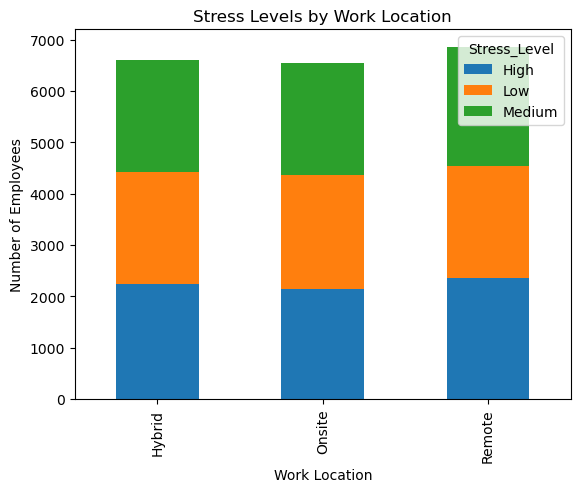

In [12]:
import matplotlib.pyplot as plt

# Group the data by Work Location and Stress Level
stress_by_location = data_cleaned.groupby(['Work_Location', 'Stress_Level']).size().unstack()

# Create a stacked bar chart
stress_by_location.plot(kind='bar', stacked=True)
plt.title('Stress Levels by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Number of Employees')
plt.show()


# Work-Life Balance Comparison

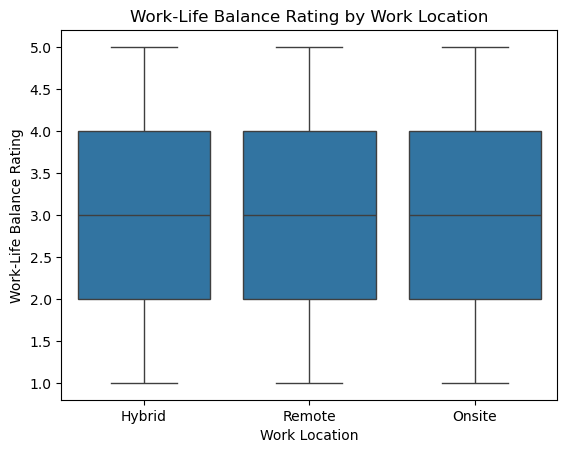

In [13]:
import seaborn as sns

# Create a boxplot
sns.boxplot(x='Work_Location', y='Work_Life_Balance_Rating', data=data_cleaned)
plt.title('Work-Life Balance Rating by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Work-Life Balance Rating')
plt.show()


# Mental Health Condition Distribution

### Remote Workers

In [ ]:
import plotly.express as px

# Filter for remote workers
remote_data = data_cleaned[data_cleaned['Work_Location'] == 'Remote']

# Create a pie chart for mental health condition distribution
fig = px.pie(remote_data, names='Mental_Health_Condition', title='Mental Health Condition Distribution for Remote Workers')
fig.show()


### Onsite Workers

In [16]:
# Filter for onsite workers
remote_data = data_cleaned[data_cleaned['Work_Location'] == 'Onsite']

# Create a pie chart for mental health condition distribution
fig = px.pie(remote_data, names='Mental_Health_Condition', title='Mental Health Condition Distribution for Onsite Workers')
fig.show()

### Hybrid Workers

In [17]:
# Filter for hybrid workers
remote_data = data_cleaned[data_cleaned['Work_Location'] == 'Hybrid']

# Create a pie chart for mental health condition distribution
fig = px.pie(remote_data, names='Mental_Health_Condition', title='Mental Health Condition Distribution for Hybrid Workers')
fig.show()